<a href="https://colab.research.google.com/github/Drishty06/Hack-The-Tank-YFD-project/blob/main/Copy_of_yfd_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import warnings
 import os
 import shutil
 import glob


# Mounting the drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




# class




In [ ]:
CLASS = ['high',  'normal']

# model building

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

from keras.layers import Dense, Flatten
from keras .models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras

 

In [ ]:
#base_model = InceptionV3(input_shape=(256, 256, 3), include_top= False)

In [ ]:
# --------------------------
from PIL import Image
import os

# Set the desired image size
new_size = (256, 256)

# # Loop over all image files in a directory and resize them
# for filename in os.listdir('/content/drive/MyDrive/DATASET/flat'):
#     if filename.endswith('.jpg') or filename.endswith('.png'): # Modify this condition based on the file extensions of your images
#         # Open the image file using PIL
#         img = Image.open(os.path.join('/content/drive/MyDrive/DATASET/flat', filename))
        
#         # Resize the image to the desired size
#         img = img.resize(new_size)
        
#         # Save the resized image to a new file
#         img.save(os.path.join('/content/drive/MyDrive/DATASET_RESIZED/flat', filename))

for filename in os.listdir('/content/drive/MyDrive/DATASET/normal'):
    if filename.endswith('.jpg') or filename.endswith('.png'): # Modify this condition based on the file extensions of your images
        # Open the image file using PIL
        img = Image.open(os.path.join('/content/drive/MyDrive/DATASET/normal', filename))
        
        # Resize the image to the desired size
        img = img.resize(new_size)
        #convert into rgb
        img = img.convert('RGB')

        # Save the resized image to a new file
        img.save(os.path.join('/content/drive/MyDrive/DATASET_RESIZED/normal', filename))
for filename in os.listdir('/content/drive/MyDrive/DATASET/high'):
    if filename.endswith('.jpg') or filename.endswith('.png'): # Modify this condition based on the file extensions of your images
        # Open the image file using PIL
        img = Image.open(os.path.join('/content/drive/MyDrive/DATASET/high', filename))
        
        # Resize the image to the desired size
        img = img.resize(new_size)

        #convert into rgb
        img = img.convert('RGB')
        
        # Save the resized image to a new file
        img.save(os.path.join('/content/drive/MyDrive/DATASET_RESIZED/high', filename))


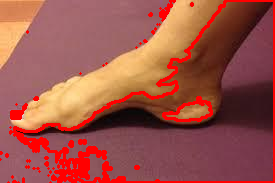

In [ ]:
# contour

import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the input image
img = cv2.imread('/content/high.jpg')
# img = img.convert('RGB')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary mask of the foot
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find the contours of the binary mask
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)
# Sort the contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Extract the largest contour which corresponds to the foot
foot_contour = contours[0]

# Get the bounding rectangle of the foot contour
x, y, w, h = cv2.boundingRect(foot_contour)

# Calculate the height of the arch as the height of the bounding rectangle
arch_height = h
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import pyheif
from PIL import Image
import os

def heic_to_jpg(file_path):
    # Open the HEIC file
    heif_file = pyheif.read(file_path)

    # Convert to PIL Image object
    image = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
        heif_file.mode,
        heif_file.stride,
    )

    # Save as JPG file with the same name
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    new_file_path = os.path.join(os.path.dirname(file_path), file_name + ".jpg")
    image.save(new_file_path, "JPEG")
    print(f"{file_path} converted to {new_file_path}")


ModuleNotFoundError: ignored

In [ ]:
pip install pyheif

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 256)               6

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Set up the training and validation data generators
train_data = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/DATASET_RESIZED/',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training')

val_data = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/DATASET_RESIZED/',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation')

#train_indices = {'normal': 0, 'high': 1}

# Set the new class_indices attribute on the datagen object
#train_data.class_indices = train_indices

print(train_data.class_indices)


Found 256 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
{'high': 0, 'normal': 1}


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/DATASET_RESIZED/')

NameError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the file path for saving the model weights
filepath = "./best1_model.h5"

# Define the checkpoint callback to save the model weights
checkpoint = ModelCheckpoint(filepath, monitor='accurary', verbose=1, save_best_only=False, mode='min')

print(checkpoint);
print(filepath)


./best1_model.h5


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.9/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
t_img,label=train_data.next()
t_img.shape

(32, 256, 256, 3)

In [ ]:
history = model.fit(train_data,epochs=5,validation_data=val_data,callbacks=checkpoint)

Epoch 1/5
8/8 [==============================] - ETA: 0s - loss: 3.2454 - accuracy: 0.6719
Epoch 1: saving model to ./best1_model.h5
8/8 [==============================] - 48s 6s/step - loss: 3.2454 - accuracy: 0.6719 - val_loss: 0.6591 - val_accuracy: 0.6667
Epoch 2/5
8/8 [==============================] - ETA: 0s - loss: 0.6508 - accuracy: 0.6719
Epoch 2: saving model to ./best1_model.h5
8/8 [==============================] - 47s 6s/step - loss: 0.6508 - accuracy: 0.6719 - val_loss: 0.6480 - val_accuracy: 0.6667
Epoch 3/5
8/8 [==============================] - ETA: 0s - loss: 0.6407 - accuracy: 0.6719
Epoch 3: saving model to ./best1_model.h5
8/8 [==============================] - 46s 6s/step - loss: 0.6407 - accuracy: 0.6719 - val_loss: 0.6330 - val_accuracy: 0.6667
Epoch 4/5
8/8 [==============================] - ETA: 0s - loss: 0.6472 - accuracy: 0.6719
Epoch 4: saving model to ./best1_model.h5
8/8 [==============================] - 46s 6s/step - loss: 0.6472 - accuracy: 0.6719 - 

In [ ]:
from keras.models import load_model
import numpy as np
import keras.utils as image
from keras.models import load_model
# Load the model from a file
model = load_model('/content/best1_model.h5')



img = image.load_img('/content/high.jpg', target_size=(256, 256))
img = img.convert('RGB')
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # normalize the pixel values
print(x)
# Make a prediction
predictions = model.predict(x)
print(predictions)
# Print the predicted class and probability
class_index = np.argmax(predictions)
print(class_index)
class_probability = predictions[0][class_index]
print(f"Predicted class: {class_index}, probability: {class_probability}")


[[[[0.9647059  0.6431373  0.42352942]
   [0.9647059  0.6431373  0.42352942]
   [0.9607843  0.6392157  0.41960785]
   ...
   [0.22745098 0.05098039 0.07843138]
   [0.23529412 0.05882353 0.08627451]
   [0.22745098 0.05098039 0.07843138]]

  [[0.8862745  0.5647059  0.34509805]
   [0.8862745  0.5647059  0.34509805]
   [0.8862745  0.5647059  0.34509805]
   ...
   [0.22352941 0.03921569 0.07058824]
   [0.24705882 0.0627451  0.09411765]
   [0.25882354 0.07450981 0.10588235]]

  [[0.8862745  0.5647059  0.34509805]
   [0.8862745  0.5647059  0.34509805]
   [0.8862745  0.5647059  0.34509805]
   ...
   [0.22352941 0.03921569 0.07058824]
   [0.24705882 0.0627451  0.09411765]
   [0.25882354 0.07450981 0.10588235]]

  ...

  [[0.59607846 0.36078432 0.40784314]
   [0.59607846 0.36078432 0.40784314]
   [0.59607846 0.36078432 0.40784314]
   ...
   [0.45490196 0.20784314 0.28235295]
   [0.45490196 0.20784314 0.28235295]
   [0.45490196 0.20784314 0.28235295]]

  [[0.59607846 0.36078432 0.40784314]
   [0.5

In [ ]:
h=history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# plt.plot(h['loss'])
# plt.plot(h['accuracy'])
# plt.show
h['accuracy']

In [ ]:
import cv2
import numpy as np

def get_arch_height(image_file):
    # Load the input image
    img = cv2.imread(image_file)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image to get a binary mask of the foot
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find the contours of the binary mask
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 0, 255), 2)
    # Sort the contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    if len(contours) == 0:
        raise ValueError("No contours found in the image")

    # Extract the largest contour which corresponds to the foot
    foot_contour = contours[0]

    # Get the bounding rectangle of the foot contour
    x, y, w, h = cv2.boundingRect(foot_contour)

    # Calculate the height of the arch as the height of the bounding rectangle
    arch_height = h
    
    return arch_height

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the input image
img = cv2.imread('/content/drive/MyDrive/Skin complextion/flat/c4.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary mask of the foot
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find the contours of the binary mask
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)
# Sort the contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Extract the largest contour which corresponds to the foot
foot_contour = contours[0]

# Get the bounding rectangle of the foot contour
x, y, w, h = cv2.boundingRect(foot_contour)

# Calculate the height of the arch as the height of the bounding rectangle
arch_height = h
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Arch height:", arch_height)

error: ignored

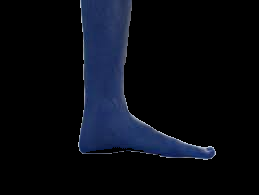

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load the image
img = cv2.imread('/content/drive/MyDrive/mast_images/flat/flat4-removebg-preview (1).png')

# Convert the image to the RGB color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Define the skin color range
lower_range = np.array([0, 20, 70], dtype=np.uint8)
upper_range = np.array([20, 255, 255], dtype=np.uint8)

# Create a binary mask of the skin areas
mask = cv2.inRange(hsv, lower_range, upper_range)

# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=mask)
filename = 'result.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, img)
# Show the result
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def process_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to the RGB color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Define the skin color range
    lower_range = np.array([0, 20, 70], dtype=np.uint8)
    upper_range = np.array([20, 255, 255], dtype=np.uint8)

    # Create a binary mask of the skin areas
    mask = cv2.inRange(hsv, lower_range, upper_range)

    # Apply the mask to the original image
    result = cv2.bitwise_and(img, img, mask=mask)

    # Save the result image
    cv2.imwrite('result.jpg', result)

    # Show the result
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
get_arch_height('/content/drive/MyDrive/mast_images/flat/flat1.png')

172

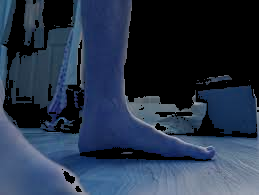

In [ ]:
process_image('/content/drive/MyDrive/mast_images/flat/original4.jpeg')

In [ ]:
import cv2
import numpy as np
import glob

def process_image_folder(file_path):
    # Load the image
    img = cv2.imread(file_path)

    # Convert the image to the RGB color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Define the skin color range
    lower_range = np.array([0, 20, 70], dtype=np.uint8)
    upper_range = np.array([20, 255, 255], dtype=np.uint8)

    # Create a binary mask of the skin areas
    mask = cv2.inRange(hsv, lower_range, upper_range)

    # Apply the mask to the original image
    result = cv2.bitwise_and(img, img, mask=mask)

    # Save the result image
    file_name = file_path.split("/")[-1]
    result_path = "/content/drive/MyDrive/Skin complextion/high/" + file_name
    cv2.imwrite(result_path, result)

# Get a list of all image files in the folder
image_files = glob.glob("/content/drive/MyDrive/mast_images/high/*.jpg") + glob.glob("/content/drive/MyDrive/mast_images/high/*.jpeg") + glob.glob("/content/drive/MyDrive/mast_images/high/*.png")

# Process each image file
for file_path in image_files:
    print(file_path)
    process_image_folder(file_path)

/content/drive/MyDrive/mast_images/high/high-removebg-preview.png
/content/drive/MyDrive/mast_images/high/high2-removebg-preview (1).png
/content/drive/MyDrive/mast_images/high/high4-removebg-preview (1).png
/content/drive/MyDrive/mast_images/high/high5-removebg-preview.png


In [ ]:
import os
import cv2
import numpy as np

def contour(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Loop over all files in the input folder
    for filename in os.listdir(input_folder):
        # Load the input image
        img = cv2.imread(os.path.join(input_folder, filename))

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Threshold the image to get a binary mask of the foot
        ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Find the contours of the binary mask
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(img, contours, -1, (0, 0, 255), 2)

        # Sort the contours by area in descending order
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        # Extract the largest contour which corresponds to the foot
        foot_contour = contours[0]

        # Get the bounding rectangle of the foot contour
        x, y, w, h = cv2.boundingRect(foot_contour)

        # Calculate the height of the arch as the height of the bounding rectangle
        arch_height = h

        # Save the processed image to the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, img)

        print("Processed image", filename, "with arch height", arch_height)

contour("/content/drive/MyDrive/Skin complextion/high/","/content/drive/MyDrive/mast_images_contour/high/")

Processed image high-removebg-preview.png with arch height 250
Processed image high2-removebg-preview (1).png with arch height 280
Processed image high4-removebg-preview (1).png with arch height 159
Processed image high5-removebg-preview.png with arch height 134


error: ignored

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the input image
img = cv2.imread('/content/drive/MyDrive/Skin complextion/flat/c4.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary mask of the foot
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find the contours of the binary mask
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)
# Sort the contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Extract the largest contour which corresponds to the foot
foot_contour = contours[0]

_, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

# Find the contour with the largest area
contours, heirarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv2.contourArea)

# Find the baseline of the foot by taking the lowest point in the contour
baseline = tuple(max_contour[max_contour[:, :, 1].argmax()][0])

# Calculate the arch height by finding the maximum distance from the baseline to the contour
arch_height = 0
for point in max_contour:
    distance = abs(baseline[1] - point[0][1])
    if distance > arch_height:
        arch_height = distance

# Display the arch height
print("The arch height is:", arch_height)

error: ignored